# Finansal Duygu Analizi (Financial Sentiment Analysis)
### Doğal Dil İşleme ve Makine Öğrenmesi Projesi


## 1. Giriş

Finansal Duygu Analizi, finansal metinlerin olumlu, olumsuz veya nötr
olarak sınıflandırılmasını amaçlayan bir doğal dil işleme problemidir.

Bu projede, finansal cümleler üzerinde makine öğrenmesi tabanlı
bir duygu analizi sistemi geliştirilmiştir.


In [44]:
import pandas as pd
import numpy as np
import re
import os

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [39]:
import kagglehub

path = kagglehub.dataset_download("sbhatti/financial-sentiment-analysis")
print("Dataset path:", path)


Using Colab cache for faster access to the 'financial-sentiment-analysis' dataset.
Dataset path: /kaggle/input/financial-sentiment-analysis


In [22]:
os.listdir(path)


['data.csv']

In [40]:
df = pd.read_csv(os.path.join(path, 'data.csv'))
df.head()


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


## 2. Veri Seti Tanıtımı

Bu projede kullanılan veri seti Kaggle platformundan alınmıştır.
Veri seti, finansal cümleler ve bu cümlelere ait duygu etiketlerinden oluşmaktadır.


In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


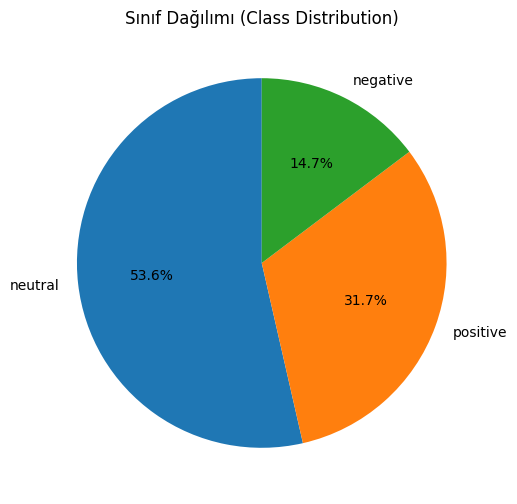

In [65]:
import matplotlib.pyplot as plt

class_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    class_counts,
    labels=class_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Sınıf Dağılımı (Class Distribution)')
plt.show()


## 3. Etiketlerin Sayısallaştırılması

Makine öğrenmesi algoritmaları metin veya kategorik verileri
doğrudan işleyemediği için, duygu etiketleri sayısal değerlere dönüştürülmüştür.


In [48]:
label_map = {'negative':0, 'neutral':1, 'positive':2}
df['label'] = df['Sentiment'].map(label_map)
df.head()


,Sentence,Sentiment,label
0,The GeoSolutions technology will leverage Bene...,positive,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,0
2,"For the last quarter of 2010 , Componenta 's n...",positive,2
3,According to the Finnish-Russian Chamber of Co...,neutral,1
4,The Swedish buyout firm has sold its remaining...,neutral,1


## 4. Metin Ön İşleme (Text Preprocessing)

Bu aşamada metin verileri aşağıdaki işlemlerden geçirilmiştir:
- Tüm harfler küçük harfe çevrilmiştir
- Noktalama işaretleri ve sayılar temizlenmiştir
- Gereksiz boşluklar kaldırılmıştır


In [51]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z ]', ' ', text)
    return text

df['clean_sentence'] = df['Sentence'].apply(clean_text)
df[['Sentence','clean_sentence']].head()


,Sentence,clean_sentence
0,The GeoSolutions technology will leverage Bene...,the geosolutions technology will leverage bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",esi on lows down to bk a real po...
2,"For the last quarter of 2010 , Componenta 's n...",for the last quarter of componenta s n...
3,According to the Finnish-Russian Chamber of Co...,according to the finnish russian chamber of co...
4,The Swedish buyout firm has sold its remaining...,the swedish buyout firm has sold its remaining...


## 5. Özellik Çıkarımı (TF-IDF)

TF-IDF yöntemi kullanılarak metin verileri sayısal vektörlere dönüştürülmüştür.
Bu yöntem, kelimelerin metin içindeki önemini ölçmektedir.


In [57]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_sentence'])
y = df['label']


## 6. Eğitim ve Test Verisinin Ayrılması

Veri seti, modelin performansını ölçebilmek amacıyla
eğitim ve test olmak üzere iki parçaya ayrılmıştır.


In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 7. Model Eğitimi

Bu projede metin sınıflandırma problemleri için yaygın olarak kullanılan
Lojistik Regresyon algoritması tercih edilmiştir.


In [54]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

## 8. Model Değerlendirme

Eğitilen modelin başarımı doğruluk (accuracy) ve sınıflandırma raporu
kullanılarak değerlendirilmiştir.


In [55]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7228400342172797
              precision    recall  f1-score   support

           0       0.49      0.15      0.23       175
           1       0.72      0.91      0.80       622
           2       0.77      0.69      0.73       372

    accuracy                           0.72      1169
   macro avg       0.66      0.58      0.59      1169
weighted avg       0.70      0.72      0.69      1169



**Precision, Recall ve F1-Score Yorumları**

Bu çalışmada model performansı precision, recall ve F1-score metrikleri kullanılarak değerlendirilmiştir.

**Precision**, modelin bir sınıfı tahmin ettiğinde ne kadarının doğru olduğunu gösterir.
Bu projede özellikle negative sınıfında precision değerinin düşük olması, modelin olumsuz duygu tahminlerinde sıkça hata yaptığını göstermektedir.

**Recall**, gerçek sınıfa ait örneklerin ne kadarının doğru yakalandığını ifade eder.
Sonuçlara göre neutral sınıfının recall değeri oldukça yüksektir. Bu durum, modelin neutral cümleleri büyük oranda doğru tespit ettiğini göstermektedir.

**F1-score**, precision ve recall değerlerinin harmonik ortalamasıdır ve dengesiz veri setlerinde en güvenilir metriktir.
Bu projede sınıflar arasında dengesizlik bulunduğu için model performansını değerlendirmede F1-score en güvenilir metrik olarak kabul edilmiştir.

**Sınıf Bazlı Performans Değerlendirmesi**

**Neutral sınıfı**, hem precision hem recall hem de F1-score açısından en başarılı sınıftır. Bunun temel nedeni, veri setinde bu sınıfa ait örneklerin sayıca fazla olmasıdır.

**Positive sınıfı**, genel olarak iyi bir performans göstermiştir ancak bazı örneklerde neutral sınıfı ile karıştığı görülmektedir.

**Negative sınıfı**, veri setinde en az sayıda örneğe sahip olduğu için model bu sınıfı öğrenmekte zorlanmıştır. Bu nedenle precision, recall ve F1-score değerleri diğer sınıflara göre düşüktür.

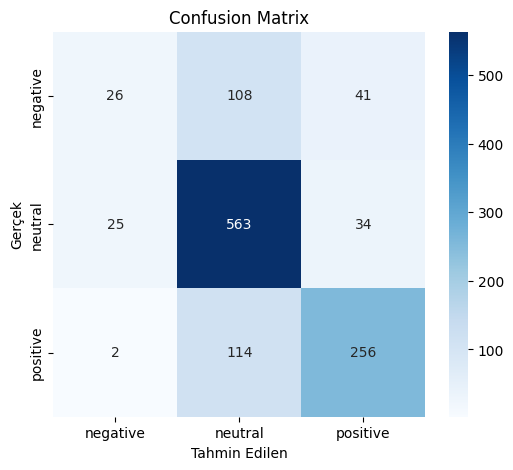

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['negative', 'neutral', 'positive'],
    yticklabels=['negative', 'neutral', 'positive']
)

plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()


“Confusion matrix değerleri, modelin negative sınıfını çoğunlukla neutral olarak tahmin ettiğini göstermektedir.”

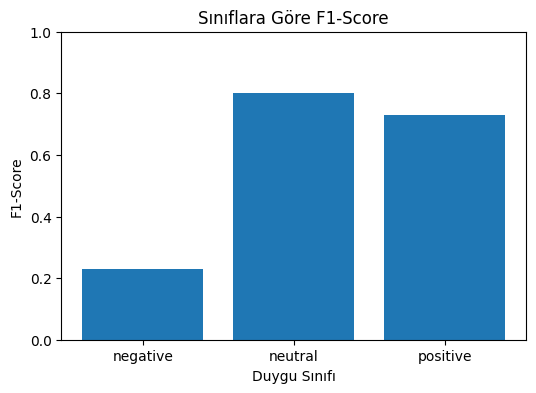

In [73]:
# GÖRSELLEŞTİRME 1: SINIF BAZLI F1-SCORE

# Bu grafik:

# “Hangi sınıfta model daha başarılı?” sorusuna cevap verir.


import matplotlib.pyplot as plt
import pandas as pd

# Classification report'u dictionary olarak al
report = classification_report(y_test, y_pred, output_dict=True)

# Sadece sınıfları al
f1_scores = {
    'negative': report['0']['f1-score'],
    'neutral': report['1']['f1-score'],
    'positive': report['2']['f1-score']
}

plt.figure(figsize=(6,4))
plt.bar(f1_scores.keys(), f1_scores.values())
plt.title('Sınıflara Göre F1-Score')
plt.xlabel('Duygu Sınıfı')
plt.ylabel('F1-Score')
plt.ylim(0,1)
plt.show()


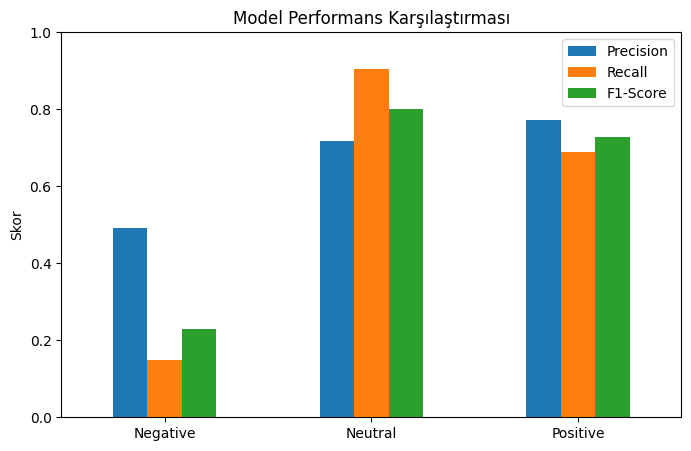

In [70]:
#*GÖRSELLEŞTİRME 2: PRECISION – RECALL – F1 KARŞILAŞTIRMASI

# Bu grafik:

# “Model hangi metrikte daha iyi/kötü?” sorusuna cevap verir.


metrics_df = pd.DataFrame({
    'Precision': [
        report['0']['precision'],
        report['1']['precision'],
        report['2']['precision']
    ],
    'Recall': [
        report['0']['recall'],
        report['1']['recall'],
        report['2']['recall']
    ],
    'F1-Score': [
        report['0']['f1-score'],
        report['1']['f1-score'],
        report['2']['f1-score']
    ]
}, index=['Negative', 'Neutral', 'Positive'])

metrics_df.plot(kind='bar', figsize=(8,5))
plt.title('Model Performans Karşılaştırması')
plt.ylabel('Skor')
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.show()


## 9. Örnek Tahmin

Eğitilen model kullanılarak örnek bir finansal cümle üzerinde
duygu tahmini gerçekleştirilmiştir.


In [71]:
sample = ["The company's profit rised significantly this quarter"]
sample_clean = [clean_text(sample[0])]
sample_vec = tfidf.transform(sample_clean)

pred = model.predict(sample_vec)

reverse_map = {0:'negative', 1:'neutral', 2:'positive'}
print("Predicted Sentiment:", reverse_map[pred[0]])


Predicted Sentiment: positive


## 10. Sonuç

Bu projede TF-IDF ve Lojistik Regresyon kullanılarak
finansal duygu analizi başarıyla gerçekleştirilmiştir.

Elde edilen sonuçlar, geleneksel makine öğrenmesi yöntemlerinin
finansal metinlerde duygu analizinde etkili olduğunu göstermektedir.
